Bike Sharing Dataset
- This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.
- Regression
- 13 features
- 17389 instances

Importing Libraries

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt
from math import log
import seaborn as sns
from scipy.stats import skew

Loading Datasets & General Overview 

In [8]:
hour_data = pd.read_csv('/Users/slavicagjorgieva/Desktop/ML.ex0/ML.ex0/data/bike+sharing+dataset/hour.csv')
day_data = pd.read_csv('/Users/slavicagjorgieva/Desktop/ML.ex0/ML.ex0/data/bike+sharing+dataset/day.csv')
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [9]:
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [21]:
print(hour_data.shape)
print(day_data.shape)   

(17379, 17)
(731, 16)


In [15]:
print(hour_data.isna().sum())  # Expect 0 missing values, as per the description
print(day_data.isna().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [23]:
day_data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [24]:
hour_data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Combining Datsets and Creating an Index

In [16]:
#merge on dteday
merged_data = pd.merge(hour_data, day_data, on='dteday', suffixes=('_hourly', '_daily'))
hourly_sum = merged_data.groupby('dteday')[['cnt_hourly', 'casual_hourly', 'registered_hourly']].sum()


In [17]:
merged_data

,instant_hourly,dteday,season_hourly,yr_hourly,mnth_hourly,hr,holiday_hourly,weekday_hourly,workingday_hourly,weathersit_hourly,...,weekday_daily,workingday_daily,weathersit_daily,temp_daily,atemp_daily,hum_daily,windspeed_daily,casual_daily,registered_daily,cnt_daily
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,...,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,...,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,...,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,...,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [28]:
merged_data['year'] = merged_data['dteday'].dt.year
merged_data['month'] = merged_data['dteday'].dt.month
merged_data['day'] = merged_data['dteday'].dt.day

#multi-level index for year, month, & day
merged_data.set_index(['year', 'month', 'day'], inplace=True)

merged_data

instant_hourly     dteday  season_hourly  yr_hourly  \
year month day                                                        
2011 1     1                 1 2011-01-01              1          0   
           1                24 2011-01-01              1          0   
           1                23 2011-01-01              1          0   
           1                22 2011-01-01              1          0   
           1                21 2011-01-01              1          0   
...                        ...        ...            ...        ...   
2012 12    31            17357 2012-12-31              1          1   
           31            17356 2012-12-31              1          1   
           31            17378 2012-12-31              1          1   
           31            17366 2012-12-31              1          1   
           31            17379 2012-12-31              1          1   

                mnth_hourly  hr  holiday_hourly  weekday_hourly  \
year month day                                                    
2011 1     1              1   0               0               6   
           1              1  23               0               6   
           1              1  22               0               6   
           1              1  21               0               6   
           1              1  20               0               6   
...                     ...  ..             ...             ...   
2012 12    31            12   1               0               1   
           31            12   0               0               1   
           31            12  22               0               1   
           31            12  10               0               1   
           31            12  23               0               1   

                workingday_hourly  weathersit_hourly  ...  weekday_daily  \
year month day                                        ...                  
2011 1     1                    0                  1  ...              6   
           1                    0                  2  ...              6   
           1                    0                  2  ...              6   
           1                    0                  2  ...              6   
           1                    0                  2  ...              6   
...                           ...                ...  ...            ...   
2012 12    31                   1                  1  ...              1   
           31                   1                  1  ...              1   
           31                   1                  1  ...              1   
           31                   1                  2  ...              1   
           31                   1                  1  ...              1   

                workingday_daily  weathersit_daily  temp_daily  atemp_daily  \
year month day                                                                
2011 1     1                   0                 2    0.344167     0.363625   
           1                   0                 2    0.344167     0.363625   
           1                   0                 2    0.344167     0.363625   
           1                   0                 2    0.344167     0.363625   
           1                   0                 2    0.344167     0.363625   
...                          ...               ...         ...          ...   
2012 12    31                  1                 2    0.215833     0.223487   
           31                  1                 2    0.215833     0.223487   
           31                  1                 2    0.215833     0.223487   
           31                  1                 2    0.215833     0.223487   
           31                  1                 2    0.215833     0.223487   

                hum_daily  windspeed_daily  casual_daily  registered_daily  \
year month day                                                               
2011 1     1     0.805833         0.160446     

Graphical Analysis of Attributes

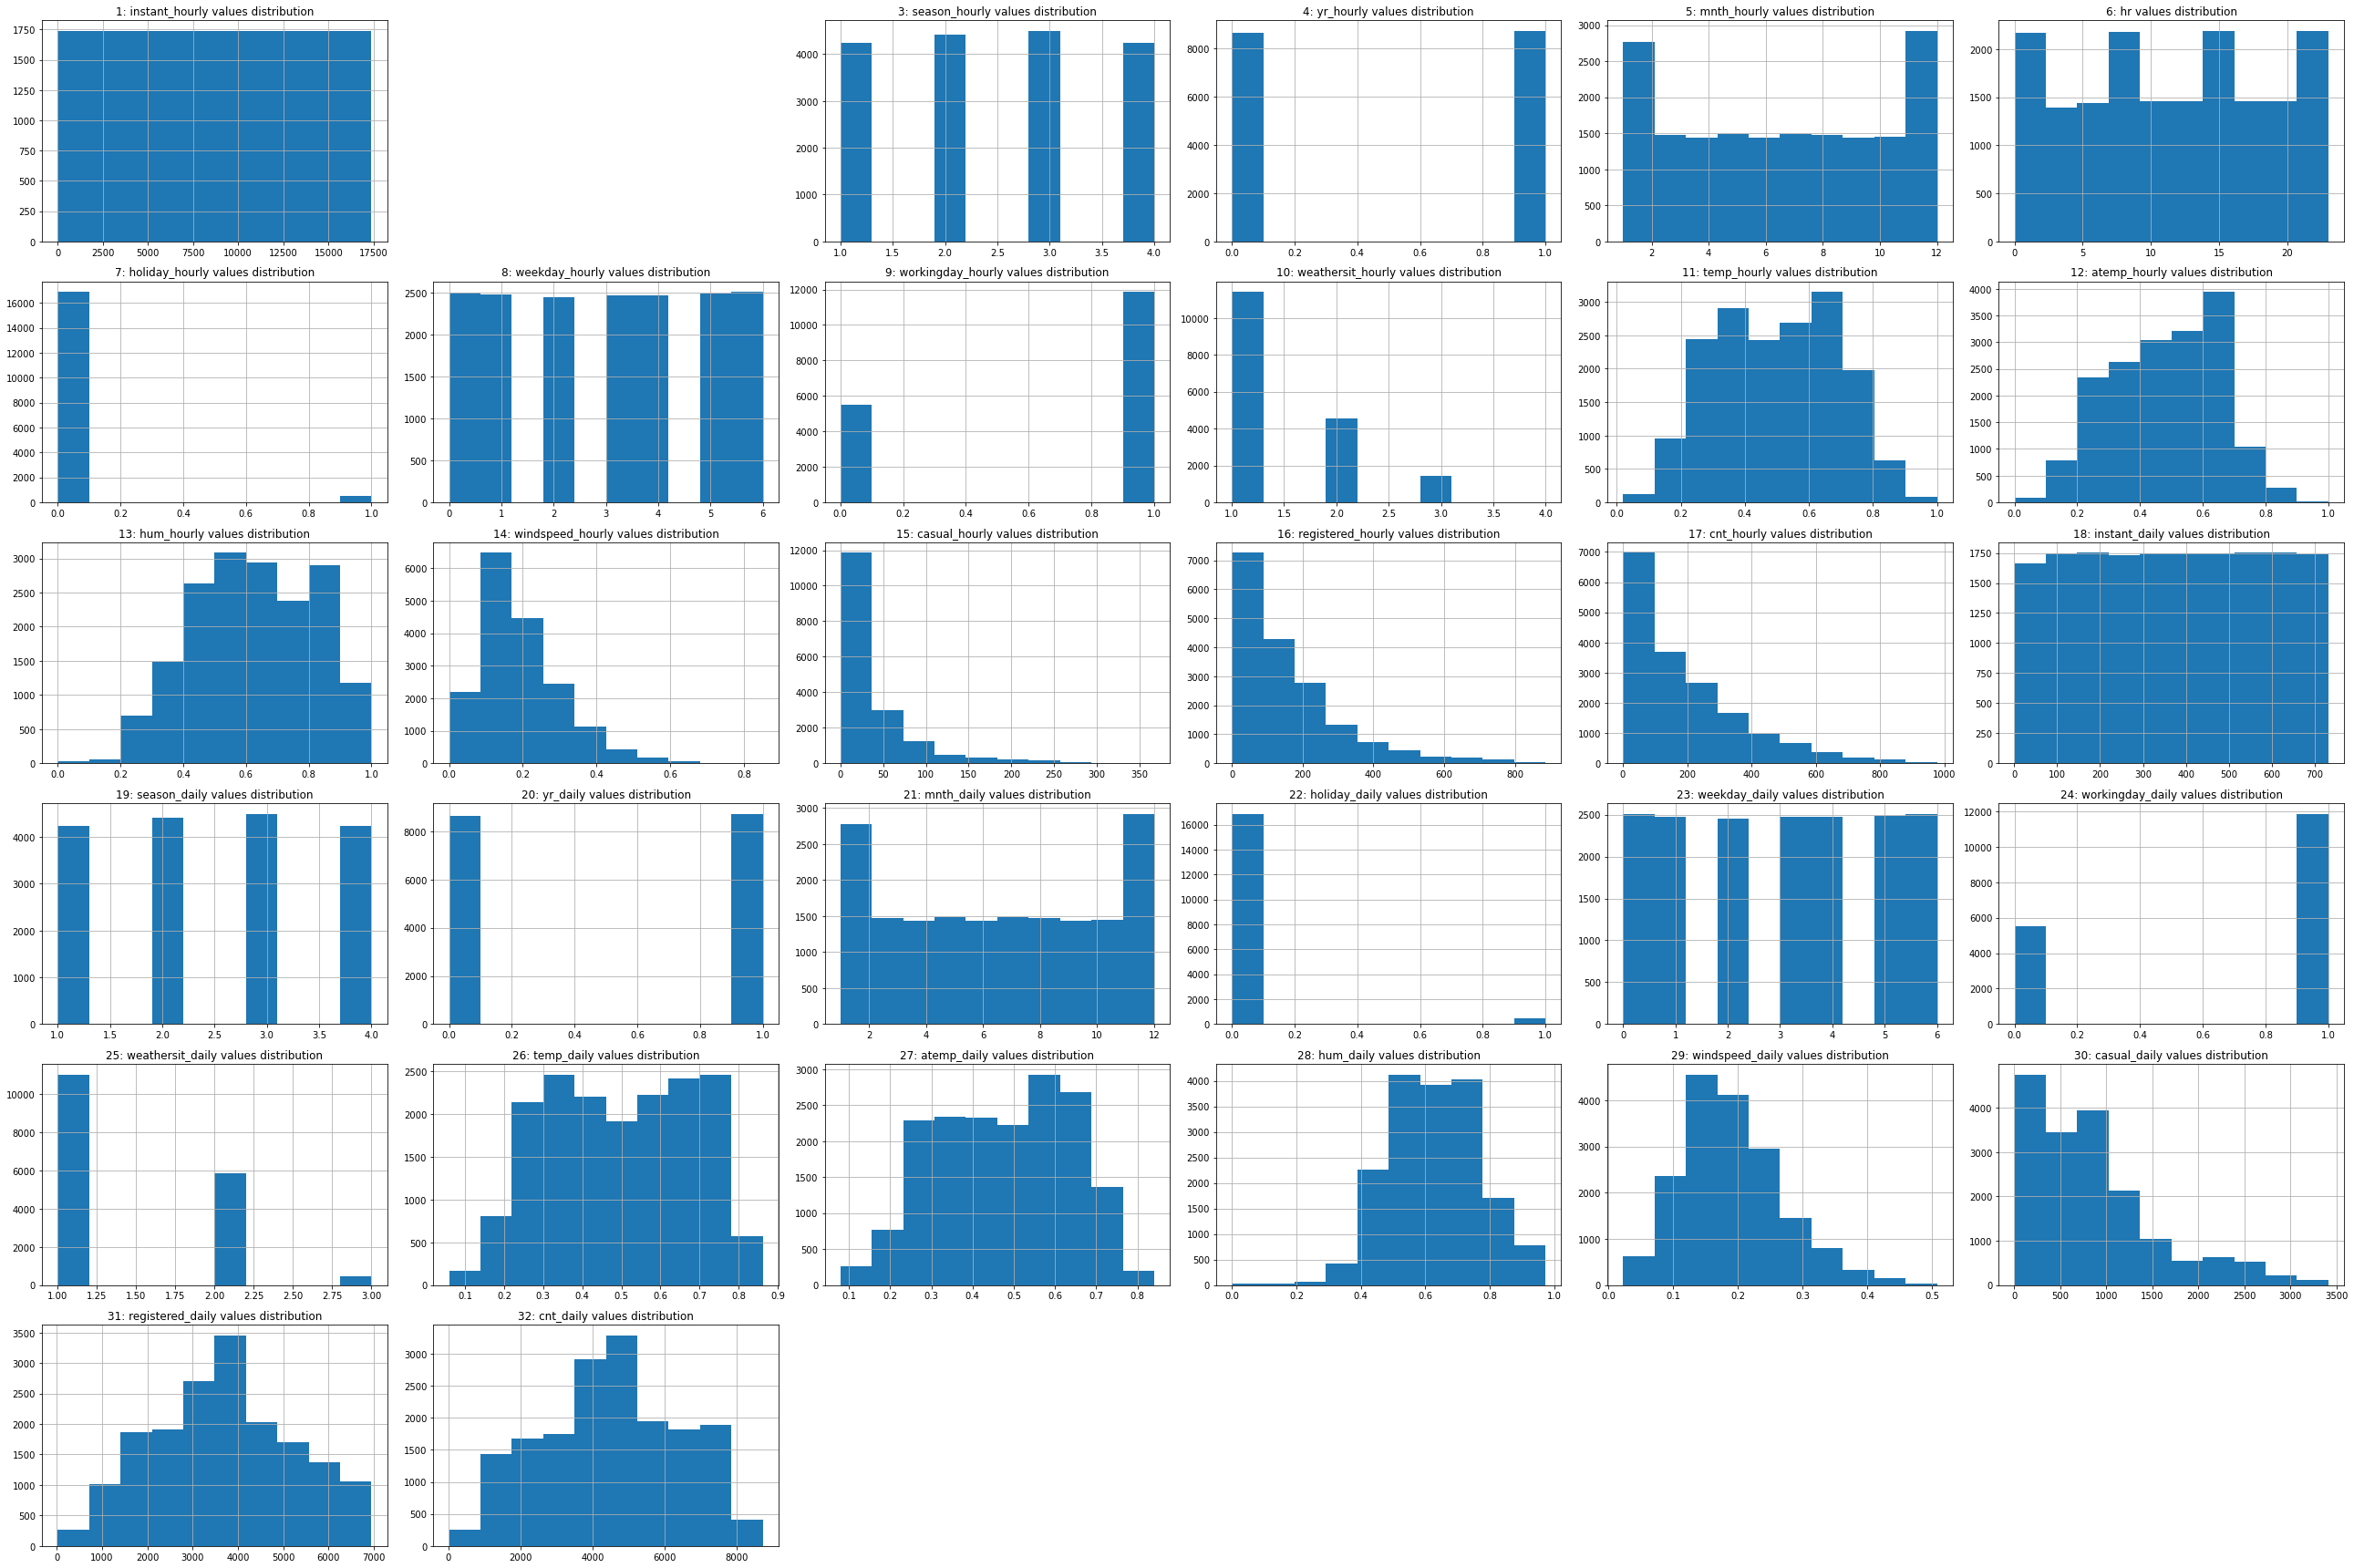

In [30]:
def draw_histograms(df):
    vars = df.columns
    n_vars = len(vars)
    ngrid = int(sqrt(n_vars)) + 1

    fig = plt.figure(figsize=(ngrid * 6, ngrid * 4))
    
    for ix, var in enumerate(vars):
        if df[var].dtype in ['int64', 'float64']:  # Only plot numeric variables
            ax = fig.add_subplot(ngrid, ngrid, ix + 1)
            df[var].hist(bins=10, ax=ax)
            ax.set_title(f"{ix + 1}: " + var + " values distribution")
    
    fig.tight_layout()
    plt.show()
draw_histograms(merged_data)

Explination of Attributes by Data Metadata
- instant: record index
	- dteday : date
	- season : season (1:winter, 2:spring, 3:summer, 4:fall)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
	- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

Analysis of histograms 

- Some histograms show skewed distributions. For example, bike rental counts where most of the values are lower and only a few instances have high rentals. This indicates that on most days/hours, rentals are moderate, but on a few occasions, rentals spike.
- The temperature and humidity distributions appear more normal (bell-shaped), especially for temp_hourly or atemp_hourly. These are continuous variables and follow a more normal distribution 

Analysis of Skewnes

Skewness of numerical variables:
 casual_hourly        2.499021
registered_hourly    1.557770
atemp_hourly        -0.090421
hum_hourly          -0.111278
windspeed_hourly     0.574856
dtype: float64


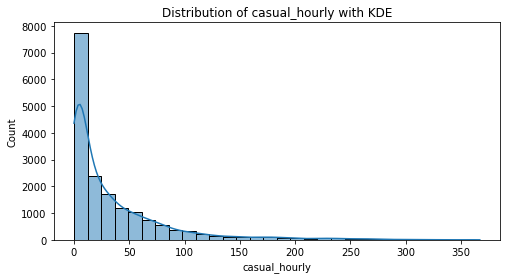

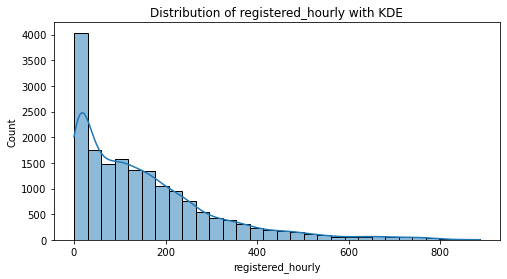

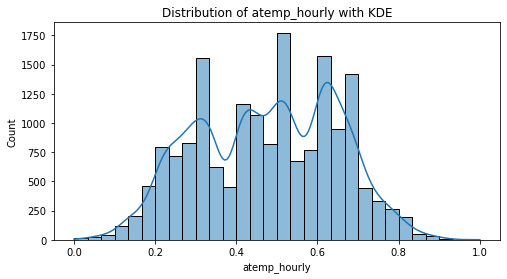

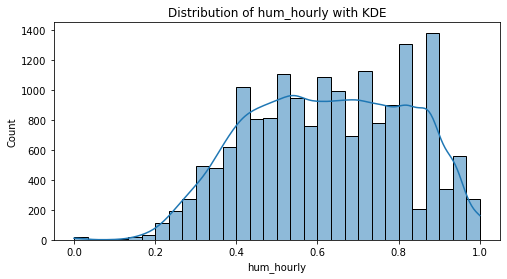

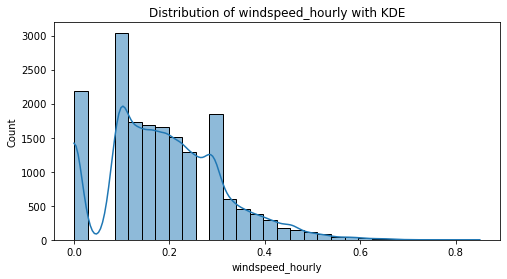

In [35]:
numerical_columns = ['casual_hourly', 'registered_hourly', 'atemp_hourly', 'hum_hourly', 'windspeed_hourly']

skewness_values = merged_data[numerical_columns].apply(skew)
print("Skewness of numerical variables:\n", skewness_values)

for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(merged_data[col], bins=30, kde=True)
    plt.title(f"Distribution of {col} with KDE")
    plt.show()

- The majority of casual users rent fewer bikes, but occasionally, there are spikes in casual bike usage.

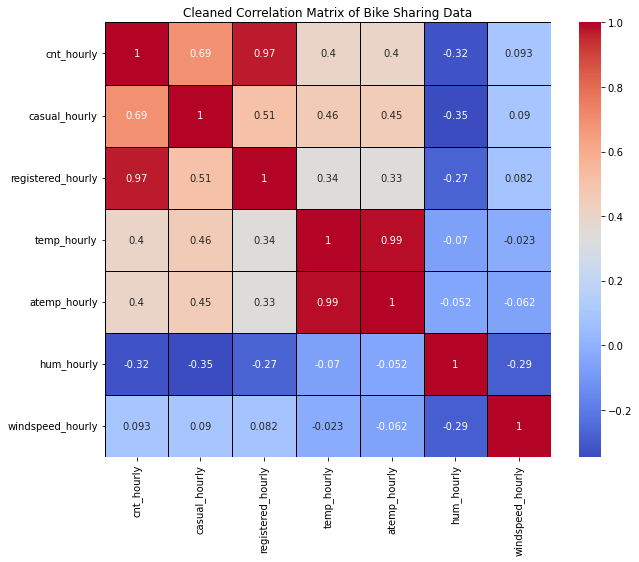

In [39]:
#we can remove some aggregated collumns for better overview 
merged_data_cleaned = merged_data.drop(columns=['cnt_daily', 'casual_daily', 'registered_daily', 
                                                'temp_daily', 'atemp_daily', 'hum_daily', 'windspeed_daily'])

numerical_columns_cleaned = ['cnt_hourly', 'casual_hourly', 'registered_hourly', 'temp_hourly', 
                             'atemp_hourly', 'hum_hourly', 'windspeed_hourly']

correlation_matrix_cleaned = merged_data_cleaned[numerical_columns_cleaned].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_cleaned, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('Cleaned Correlation Matrix of Bike Sharing Data')
plt.show()

- Correlatuion of 0.97 between cnt_hourly and registered_hourly, 0.69 between cnt_hourly and casual_hourly shows that when registered users rent more bikes, casual rent more as well, and vice versa.
- Moderate positive correlation (0.40) between bike rentals (cnt_hourly) and temperature (temp_hourly) shows that higher temperatures is somewhat associated with higher bike rentals. However, this correlation is not extremely strong, indicating that other factors determine bike rentals.
- Weak negative correlation between windspeed_hourly and bike rentals (cnt_hourly: -0.32, casual_hourly: -0.35, registered_hourly: -0.27) meaning higher wind speeds are associated with fewer bike rentals.


Suggestions
- maybe we can drop one of temp_hourly and atemp_hourly in the predictive modeling later on to avoid multicollinearity.